In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airline_data_df = pd.read_csv("bitcoinfinal.csv")
#airline_data_df = pd.read_csv("exchange-rate-twi.csv")


In [3]:
airline_data_df.head(15)


,0,217.4
0,1,255.7
1,2,244.3
2,3,236.1
3,4,228.7
4,5,262.9
5,6,284.5
6,7,231.4
7,8,236.5
8,9,316.0
9,10,376.9


In [4]:
airline_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       31 non-null     int64  
 1   217.4   31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [5]:
airline_data_df.columns = ['date', 'passenger_count']

In [6]:
airline_data_df.head()

,date,passenger_count
0,1,255.7
1,2,244.3
2,3,236.1
3,4,228.7
4,5,262.9


In [7]:
# Time Series ANalysis

In [8]:
airline_data_df= airline_data_df.set_index('date')

In [9]:
airline_data_df.head()

,passenger_count
date,
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9


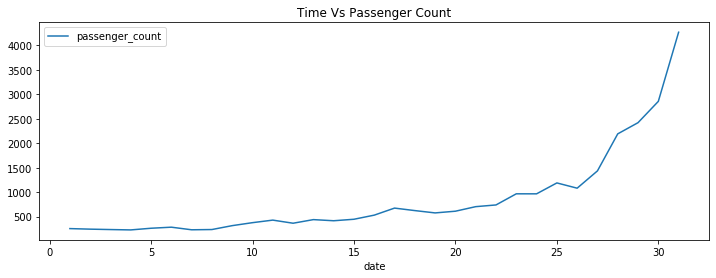

In [10]:
# Plot the axis
airline_data_df.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Time Vs Passenger Count")
plt.show()

In [11]:
len(airline_data_df)

31

In [12]:
# Build and evaluate the time series model

In [13]:
# Train test split
train_len = 29
train = airline_data_df[:train_len]
test = airline_data_df[train_len:]

In [14]:
train.head()

,passenger_count
date,
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9


In [15]:
# Naive Method
y_hat_naive = test.copy()
y_hat_naive['forecast'] = train['passenger_count'][train_len-1]


In [53]:
train['passenger_count'][train_len-1]

2191.8

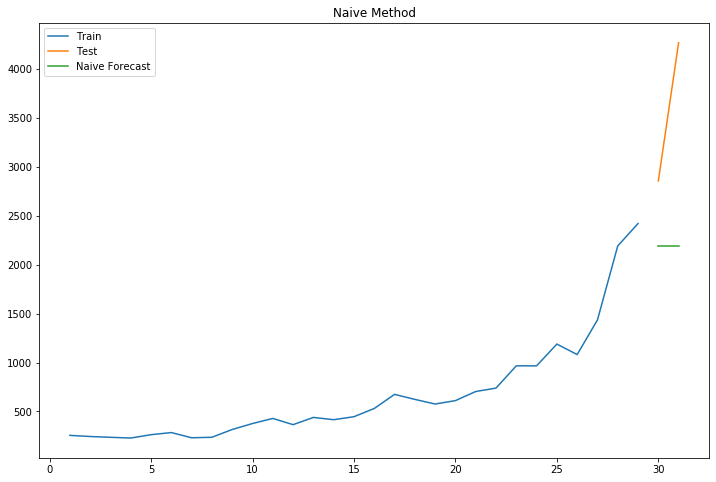

In [16]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_naive['forecast'], label= 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

In [17]:
# Calculate RMSE and MAPE to evaluate forecast
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_naive['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_naive['forecast'])/test['passenger_count'])*100, 2)
                
results = pd.DataFrame({'method':['Naive Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = results[['method','RMSE', "MAPE"]]  
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96


In [18]:
# Simple Average method 
y_hat_avg = test.copy()
y_hat_avg['forecast'] = train['passenger_count'].mean()

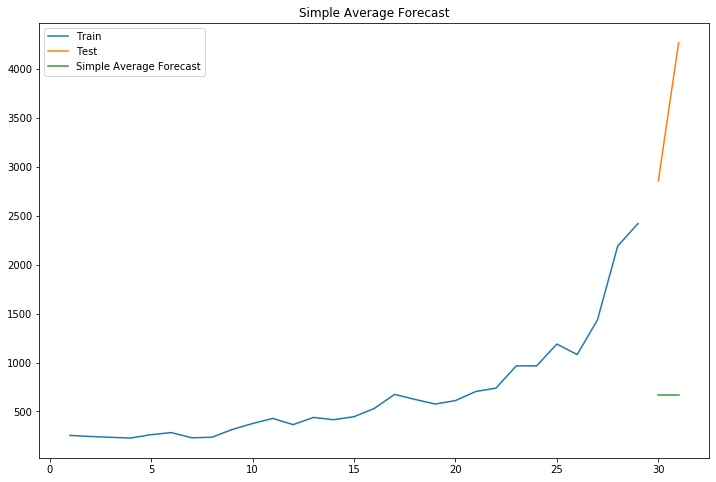

In [19]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_avg['forecast'], label= 'Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_avg['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_avg['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Average Method,2975.73,80.37


In [21]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37


In [22]:
# Time Series Cross Validation 
# 1. One step Validation
# 2. Multistep Validation

In [23]:
# Moving Average Method
# Moving window average - window - 12 months, 6 months

In [24]:
y_hat_sma = airline_data_df.copy()
m_window = 12
y_hat_sma['sma_forecasting'] = y_hat_sma['passenger_count'].rolling(m_window).mean()
# test data is not available so keep the fix value of last forecasted
y_hat_sma['sma_forecasting'][train_len:] = y_hat_sma['sma_forecasting'][train_len-1]

In [25]:
y_hat_sma.tail()

,passenger_count,sma_forecasting
date,,
27,1435.2,841.525
28,2191.8,979.950
29,2420.7,1125.450
30,2856.0,979.950
31,4268.8,979.950


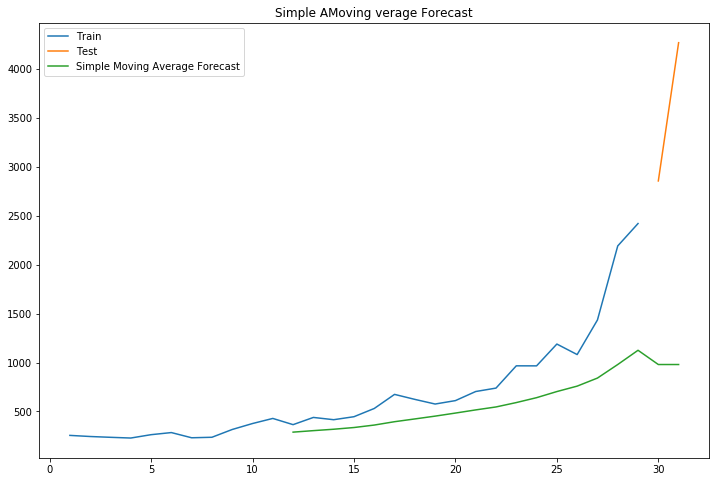

In [26]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sma['sma_forecasting'], label= 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple AMoving verage Forecast")
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sma['sma_forecasting'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sma['sma_forecasting'][train_len:])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Moving Average Method,2677.32,71.37


In [28]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37


In [29]:
# 6 month window size
y_hat_sma = airline_data_df.copy()
m_window = 6
y_hat_sma['sma_forecasting'] = y_hat_sma['passenger_count'].rolling(m_window).mean()
# test data is not available so keep the fix value of last forecasted
y_hat_sma['sma_forecasting'][train_len:] = y_hat_sma['sma_forecasting'][train_len-1]

In [30]:
y_hat_sma['sma_forecasting'][train_len-1]

1305.1000000000001

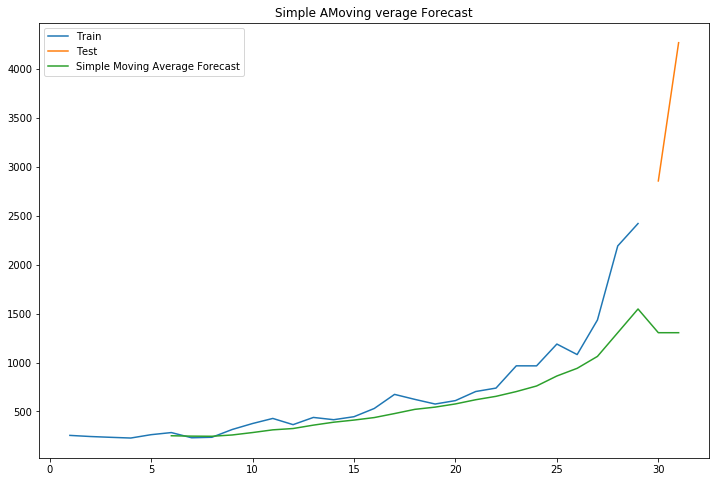

In [31]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sma['sma_forecasting'], label= 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple AMoving verage Forecast")
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sma['sma_forecasting'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sma['sma_forecasting'][train_len:])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Moving 6 month Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Moving 6 month Average Method,2365.25,61.87


In [33]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37
0,Simple Moving 6 month Average Method,2365.25,61.87


In [34]:
# Simple Exponential Smoothing 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [35]:
model = SimpleExpSmoothing(train['passenger_count'])
model_fit = model.fit(smoothing_level =0.15, optimized =False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['forecast'] = model_fit.forecast(24)

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


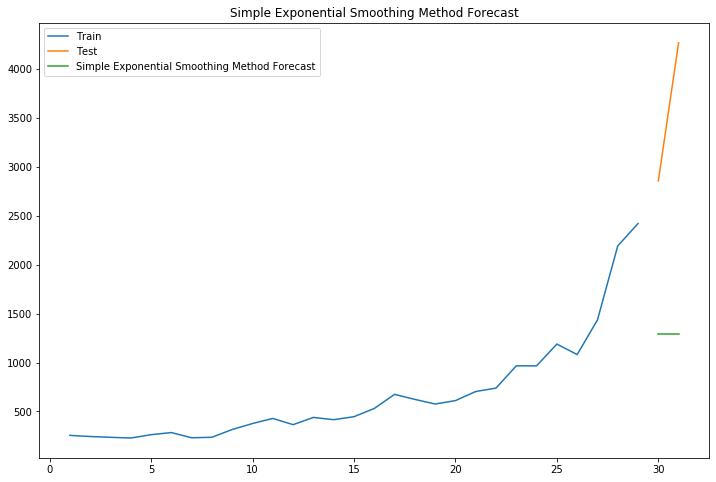

In [36]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_ses['forecast'], label= 'Simple Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method Forecast")
plt.show()

In [37]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_ses['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_ses['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Exponential Smoothing  Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Exponential Smoothing Method,2380.76,62.34


In [38]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37
0,Simple Moving 6 month Average Method,2365.25,61.87
0,Simple Exponential Smoothing Method,2380.76,62.34


#### Exponential Smoothing with level and Trend
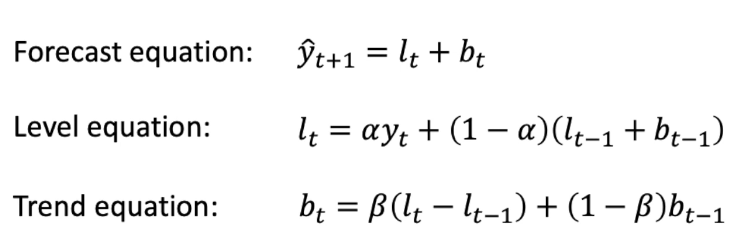

In [39]:
# Exponential Smooting -- Trend & Level
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=12, trend = 'additive', seasonal=None)
model_fit = model.fit(smoothing_level =0.2, smoothing_slope = 0.01, optimized =False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 255.7, 'initial_slope': -11.399999999999977, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


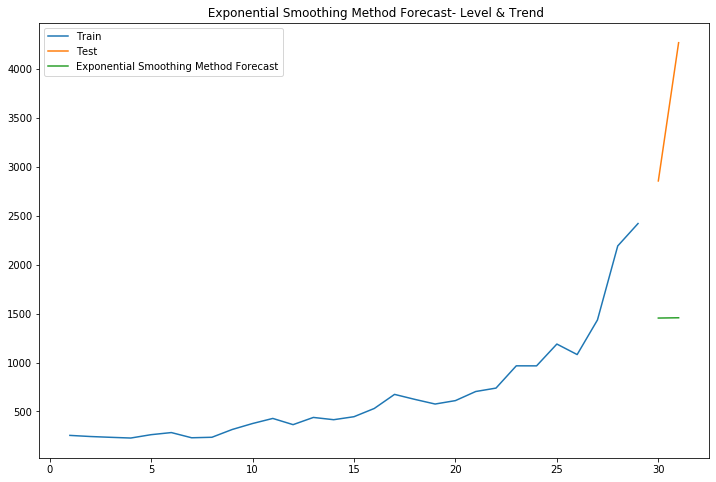

In [41]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holt['forecast'], label= 'Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level & Trend")
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holt['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holt['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level & Trend'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Exponential Smoothing Method Level & Trend,2220.96,57.46


In [43]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37
0,Simple Moving 6 month Average Method,2365.25,61.87
0,Simple Exponential Smoothing Method,2380.76,62.34
0,Exponential Smoothing Method Level & Trend,2220.96,57.46


### Exponential Smooting Forecasting Method - Level , Trend & Seasonality
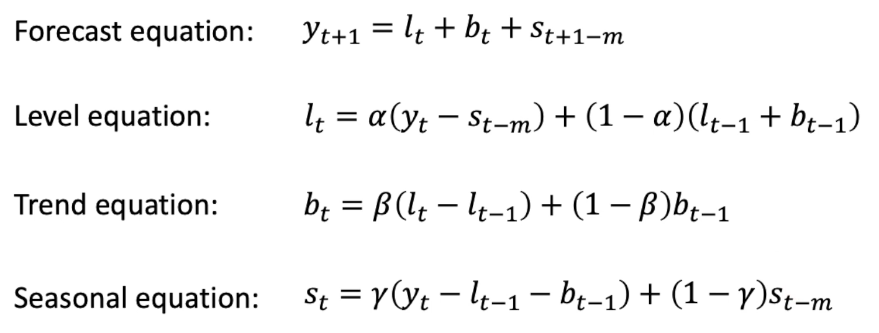

In [44]:

model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=10, trend = 'additive', seasonal='additive')
model_fit = model.fit(optimized =True)
print(model_fit.params)
y_hat_holts = test.copy()
y_hat_holts['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999, 'smoothing_slope': 0.21052631578947367, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 462.9333333333334, 'initial_slope': 24.397000000000006, 'initial_seasons': array([-207.23333333, -218.63333333, -226.83333333, -234.23333333,
       -200.03333333, -178.43333333, -231.53333333, -226.43333333,
       -146.93333333,  -86.03333333]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


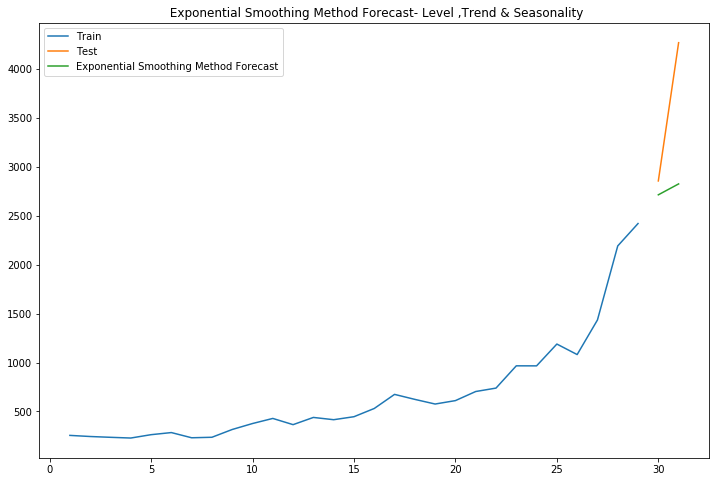

In [45]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holts['forecast'], label= 'Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level ,Trend & Seasonality")
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holts['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holts['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level ,Trend & Sesnality'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,"Exponential Smoothing Method Level ,Trend & S...",1025.45,19.39


In [47]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37
0,Simple Moving 6 month Average Method,2365.25,61.87
0,Simple Exponential Smoothing Method,2380.76,62.34
0,Exponential Smoothing Method Level & Trend,2220.96,57.46
0,"Exponential Smoothing Method Level ,Trend & S...",1025.45,19.39


In [48]:
# Holt winters Multiplicative Trend and Seasonality

In [49]:

model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=10, trend = 'additive', seasonal='multiplicative')
model_fit = model.fit(optimized =True)
print(model_fit.params)
y_hat_holtsm = test.copy()
y_hat_holtsm['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999999992507, 'smoothing_slope': 0.40701393789746754, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 462.93258244324096, 'initial_slope': 24.396233165043743, 'initial_seasons': array([0.60288884, 0.52926105, 0.59108647, 0.50563311, 0.53316831,
       0.44302761, 0.50569137, 0.6397266 , 0.62369945, 0.59423131]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


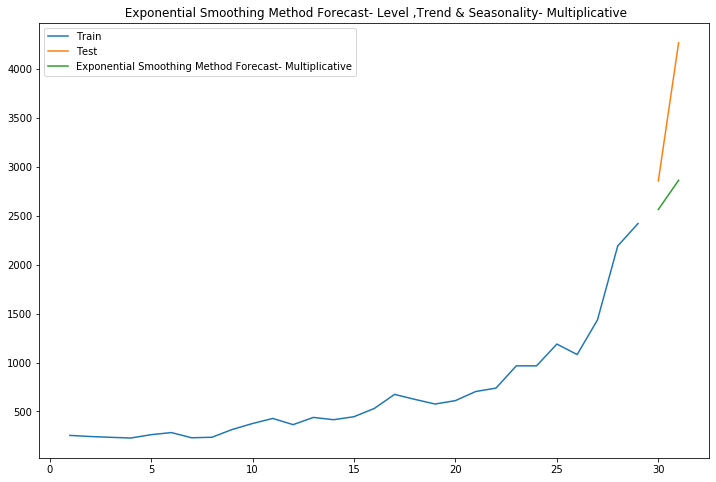

In [50]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holtsm['forecast'], label= 'Exponential Smoothing Method Forecast- Multiplicative')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level ,Trend & Seasonality- Multiplicative")
plt.show()

In [51]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holtsm['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holtsm['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level ,Trend & Sesnality'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,"Exponential Smoothing Method Level ,Trend & S...",1015.33,21.58


In [52]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,1541.93,35.96
0,Simple Average Method,2975.73,80.37
0,Simple Moving Average Method,2677.32,71.37
0,Simple Moving 6 month Average Method,2365.25,61.87
0,Simple Exponential Smoothing Method,2380.76,62.34
0,Exponential Smoothing Method Level & Trend,2220.96,57.46
0,"Exponential Smoothing Method Level ,Trend & S...",1025.45,19.39
0,"Exponential Smoothing Method Level ,Trend & S...",1015.33,21.58
